In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
CNN1_MP10 = pd.read_csv('CNN1_MP10.csv')

In [4]:
CNN1_MP10.head(9)

,DV,HR,TEMP,VV,MP10
0,135.0,36.0,20.8,14.5,21.0
1,135.0,35.0,21.3,12.9,12.0
2,112.5,33.0,21.3,11.3,9.0
3,135.0,30.0,21.9,11.3,10.0
4,112.5,31.0,21.2,9.7,14.0
5,112.5,30.0,19.7,8.0,5.0
6,135.0,45.0,16.9,6.4,13.0
7,NaN,49.0,15.3,NaN,204.0
8,360.0,44.0,14.8,0.0,693.0


In [5]:
CNN1_MP10.isna().sum()

DV      3984
HR      4036
TEMP    4036
VV      3984
MP10    1012
dtype: int64

In [6]:
CNN1_MP10 = CNN1_MP10.interpolate()

In [7]:
CNN1_MP10.isna().sum()

DV      0
HR      0
TEMP    0
VV      0
MP10    0
dtype: int64

In [8]:
CNN1_MP10.head(9)

,DV,HR,TEMP,VV,MP10
0,135.0,36.0,20.8,14.5,21.0
1,135.0,35.0,21.3,12.9,12.0
2,112.5,33.0,21.3,11.3,9.0
3,135.0,30.0,21.9,11.3,10.0
4,112.5,31.0,21.2,9.7,14.0
5,112.5,30.0,19.7,8.0,5.0
6,135.0,45.0,16.9,6.4,13.0
7,247.5,49.0,15.3,3.2,204.0
8,360.0,44.0,14.8,0.0,693.0


In [9]:
# select the input variables
input_cols = ['DV', 'HR', 'TEMP', 'VV']

# instantiate the StandardScaler object
scaler = StandardScaler()

# fit and transform the input variables
CNN1_MP10[input_cols] = scaler.fit_transform(CNN1_MP10[input_cols])

# check the normalized data
print(CNN1_MP10.head())

         DV        HR      TEMP        VV  MP10
0 -0.205296 -0.221798 -0.207580  2.099207  21.0
1 -0.205296 -0.267996 -0.095558  1.748467  12.0
2 -0.487732 -0.360393 -0.095558  1.397727   9.0
3 -0.205296 -0.498988  0.038867  1.397727  10.0
4 -0.487732 -0.452790 -0.117963  1.046987  14.0


In [10]:
# select the input variables and target variable
input_cols = ['DV', 'HR', 'TEMP', 'VV']
target_col = 'MP10'

# split the data into train and test sets
train_df, test_df = train_test_split(CNN1_MP10, test_size=0.2, random_state=42)

# split the train data into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# separate the input and target variables for each dataset
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]
test_inputs, test_targets = test_df[input_cols], test_df[target_col]

# check the shapes of the input and target variables for each dataset
print(f'Training inputs shape: {train_inputs.shape}, Training targets shape: {train_targets.shape}')
print(f'Validation inputs shape: {val_inputs.shape}, Validation targets shape: {val_targets.shape}')
print(f'Testing inputs shape: {test_inputs.shape}, Testing targets shape: {test_targets.shape}')


Training inputs shape: (11960, 4), Training targets shape: (11960,)
Validation inputs shape: (2990, 4), Validation targets shape: (2990,)
Testing inputs shape: (3738, 4), Testing targets shape: (3738,)


In [11]:
# define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_inputs.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Metal device set to: Apple M1 Max


In [12]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [17]:
# train the model
history = model.fit(train_inputs, train_targets, validation_data=(val_inputs, val_targets), epochs=50, batch_size=64)

Epoch 1/50
187/187 [==============================] - 1s 6ms/step - loss: 611128.4375 - val_loss: 590665.3750
Epoch 2/50
187/187 [==============================] - 1s 5ms/step - loss: 610691.4375 - val_loss: 589789.6250
Epoch 3/50
187/187 [==============================] - 1s 6ms/step - loss: 610193.1250 - val_loss: 589192.1875
Epoch 4/50
187/187 [==============================] - 1s 5ms/step - loss: 609533.0000 - val_loss: 589196.6875
Epoch 5/50
187/187 [==============================] - 1s 5ms/step - loss: 608951.5000 - val_loss: 588945.1875
Epoch 6/50
187/187 [==============================] - 1s 5ms/step - loss: 608254.1250 - val_loss: 588771.6250
Epoch 7/50
187/187 [==============================] - 1s 5ms/step - loss: 607813.8125 - val_loss: 588524.0000
Epoch 8/50
187/187 [==============================] - 1s 5ms/step - loss: 607430.9375 - val_loss: 587610.5625
Epoch 9/50
187/187 [==============================] - 1s 5ms/step - loss: 607034.4375 - val_loss: 586813.3750
Epoch 10/5

In [18]:
# evaluate the model on the test set
test_loss = model.evaluate(test_inputs, test_targets)
print(f'Test loss: {test_loss:.4f}')

117/117 [==============================] - 0s 3ms/step - loss: 599976.9375
Test loss: 599976.9375


In [20]:
# predict the PM10 values for the test set
test_predictions = model.predict(test_inputs).flatten()

117/117 [==============================] - 0s 2ms/step


In [28]:
test_predictions

array([237.45166,  82.26529, 173.54102, ..., 486.1708 , 612.504  ,
       643.13873], dtype=float32)

In [29]:
# create a sequence from 1 to the length of the test set
x = np.arange(1, len(test_targets) + 1)

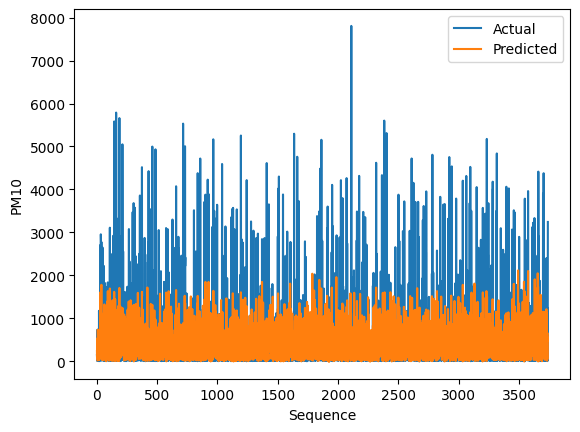

In [30]:
# plot the actual values and predicted values on the same plot
plt.plot(x, test_targets, label='Actual')
plt.plot(x, test_predictions, label='Predicted')
plt.xlabel('Sequence')
plt.ylabel('PM10')
plt.legend()
plt.show()

In [32]:
(test_targets > 500).value_counts()[True]

855

In [33]:
test_targets

3656      145.000000
4785       46.000000
5018        9.000000
13044      22.000000
3989      736.000000
            ...     
8663       44.923077
11974       6.000000
6682     1240.500000
11482     212.000000
4229     3244.000000
Name: MP10, Length: 3738, dtype: float64